In [2]:
import numpy as np
#import tensorflow.nn
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
from filters import *

In [3]:
# !pip install tensorflow-addons
# from tensorflow_addons.image import median_filter2d

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rc('image', cmap='jet')


HW_path = '/Users/parsa/Daneshgah/Arshad/2/DIP/HomeWorks/HW1-1400-2/'
images_path = os.path.join(HW_path, 'images')
results_path = os.path.join(HW_path, 'results')


# 5

In [6]:
image = plt.imread(os.path.join(images_path, '4.jpg'))
print(np.all(image[..., 0] == image[..., 1]), np.all(image[..., 2] == image[..., 1]))
image = image[..., 0]
image.shape

True True


(537, 716)

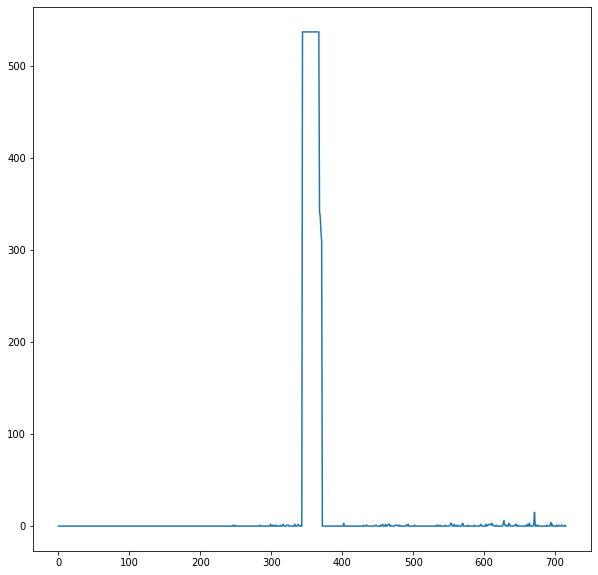

In [7]:
def x_profile(img: np.ndarray):
    img = (img).astype(int)
    a = [0 for x in range(img.shape[1])]
    for i in range(img.shape[1]):
        a[i] = np.count_nonzero(img[:, i] == 255)
    return a

xp = x_profile(image)
plt.plot(xp)

In [8]:
t1 = False
t2 = False
for i, x in enumerate(np.array(xp) > 100):
    if t1 == False:
        if x == 1:
            t1 = i
    else:
        if x == 0:
            t2 = i
            break
    
image1_left = image[:, :t1]
image1_right = image[:, t2:]
image1_left.shape, image1_right.shape

((537, 344), (537, 344))

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].imshow(image1_left, cmap='gray')
axes[1].imshow(image1_right, cmap='gray')

In [10]:
def threshold_image(img: np.ndarray, t):
    return (img > t).astype(float)

In [ ]:
thresholded = threshold_image(image1_left, 170)
plt.imshow(thresholded, cmap='gray')

In [12]:
if image1_right.shape == image1_left.shape:
    image1 = np.dstack((image1_left, image1_right))
else:
    raise

In [13]:
image1_fft = np.zeros_like(image1, dtype=np.cdouble)

for i in range(2):
    image1_fft[..., i] = fft(image1[..., i], list(np.array(image1.shape[:-1])))

In [ ]:
im = plt.imshow(increase_contrast(image1_fft[..., 1]))
plt.colorbar(im, fraction=0.035, pad=0.04)

In [15]:
d0 = 5

1 0
5.713573166358 269.5817399343853
6.670905720142017 269.18820944264127


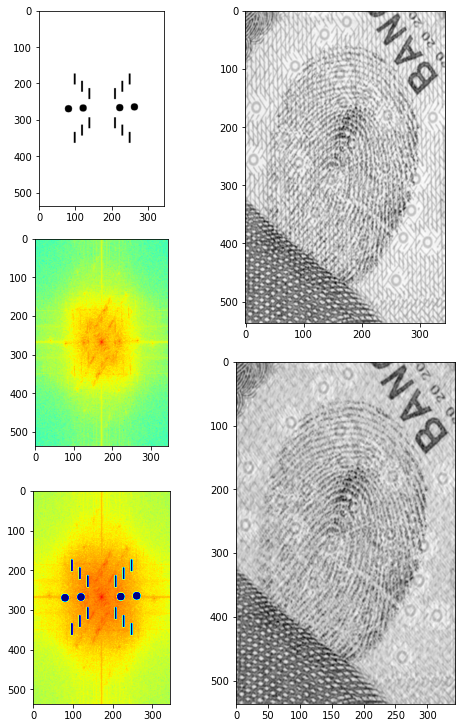

In [19]:
height, width, c = image1_fft.shape

my_filter = 1
for x, y in [(80, 270), [260,265], (120, 268), (220, 267)]:
    my_filter *= noghte_filter(height, width, x, y, 10)
    
for x, y in [(35, 40),(55,60), (75, 80)]:
    my_filter *= mostatil_filter(height, width, x, y, 30, 5)
    my_filter *= mostatil_filter(height, width, -x, -y, 30, 5)
    my_filter *= mostatil_filter(height, width, -x, y, 30, 5)
    my_filter *= mostatil_filter(height, width, x, -y, 30, 5)



new_spectrum = image1_fft[...] * my_filter[..., np.newaxis]
print(my_filter.max(), my_filter.min())
fig, axd = plt.subplot_mosaic([[0, 4, 4,],
                               [0, 4, 4,],
                               [1, 4, 4,],
                               [1, 3, 3,],
                               [2, 3, 3,],                               
                               [2, 3, 3,]],
                              figsize=(7, 10), constrained_layout=True)


axd[0].imshow(my_filter, cmap='gray')

axd[1].imshow(increase_contrast(image1_fft[..., 0]))
axd[2].imshow(increase_contrast(new_spectrum[..., 0]))

image1_ifft = np.zeros_like(image1, dtype=float)
for i in range(2):
    pure_ifft = ifft(new_spectrum[..., i], list(np.array(image1.shape[:-1]))).astype(float)
    print(pure_ifft.min(), pure_ifft.max())
    image1_ifft[..., i] = (pure_ifft - pure_ifft.min()) / (pure_ifft.max() - pure_ifft.min())

axd[3].imshow(image1_ifft[..., 0], cmap='gray')
axd[4].imshow(image1_left, cmap='gray')
